In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://media.githubusercontent.com/media/RasakOlasunkanmi/Practice_datasets/refs/heads/master/winequality-white.csv'

def load_data(path):
    df = pd.read_csv(path, sep = ";")
    return df

df = load_data(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
def checkInfo(df):
    return df.info()

checkInfo(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


there are 4,898 rows (observations) and 12 columns (features).
All entries are non-null, which means there are no missing values — that’s great, no imputation needed.

Column Breakdown

11 columns are numerical and continuous (float64) — these describe the chemical properties of the wine.

1 column (quality) is integer type — which is our target variable (the wine’s quality rating).


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


General Overview

You have 4898 complete observations, no missing data.
All 12 variables are numeric — quality is the main outcome, while the others are continuous predictors.

1. Central Patterns (Mean and Median)

Most variables have means close to their medians (50th percentile).
That suggests roughly symmetric distributions, except for a few that show large gaps between mean and median — a hint of skewness.

2. Variables Showing Skewness

Let’s check which ones look unevenly distributed based on their mean–median–max pattern:

Residual sugar: mean = 6.39, median = 5.20, max = 65.8 → strong right-skew (many small values, few large ones).

Free sulfur dioxide: mean = 35.3, median = 34.0, max = 289 → right-skew.

Total sulfur dioxide: mean = 138.4, median = 134.0, max = 440 → right-skew.

Chlorides: mean = 0.046, median = 0.043, max = 0.346 → mild right-skew.
These might have outliers or long upper tails.

3. Spread and Variation

The standard deviation (std) tells how much values differ from the mean.

Variables like residual sugar (std ≈ 5.07) and total sulfur dioxide (std ≈ 42.5) vary a lot → these features differ widely across samples.

Others like pH (std ≈ 0.15) or density (0.003) are much more stable.

4. Range and Distribution

The difference between min and max shows the range:

Narrow range → consistent measurements (e.g., pH from 2.7–3.8).

Wide range → highly variable (e.g., residual sugar 0.6–65.8).

So, some features have tightly grouped values, others are widely scattered.

5. Target Variable (quality)

Mean = 5.88, median = 6.0, range = 3–9.
That means most values are clustered near 6, with a few very low or high ones.
The distribution is slightly right-skewed, since the mean is a bit below the median.

6. Summary of Insights

No missing values.

Some variables (especially residual sugar and sulfur measures) are highly variable and likely right-skewed.

Others (pH, density, sulphates) are tightly distributed — they change little across samples.

The quality variable is narrowly distributed around 6, suggesting most samples fall in a middle range rather than extreme quality scores.

In [6]:
def check_missing_value(df):
    return df.isna().sum()

check_missing_value(df)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset is 100% clean in terms of missing data.

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [9]:
# re-classify
df = df.replace({'quality':{9: 'best', 8:'best', 7:'Good', 6:'Good', 5:'Average', 4:'bad', 3:'bad'}})


In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good


In [11]:
df['quality'].value_counts()

quality
Good       3078
Average    1457
bad         183
best        180
Name: count, dtype: int64

In [12]:
# Data preprocessing
x = df.drop(columns='quality')
y = df['quality']

In [13]:
# lets scale the feature
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)

Different features have different units or scales
For example, in the data:

residual sugar ranges up to 65.8

pH ranges around 3.0

density is around 0.99
Without scaling, features with larger ranges dominate the model’s calculations (especially distance-based ones like KNN or gradient-based ones like logistic regression).

MinMaxScaler is used because it:

Brings all numeric features to the same range (fairness)

Preserves distribution and relationships

Speeds up learning

Prevents domination by large-valued features

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=72)

The dataset is split into training and testing parts:

|Part	|Content	|Purpose	|Size|
--------|-----------|-----------|----|
x_train|	Scaled features for training|	Used by the model to learn patterns|	80% of data|
x_test|	Scaled features for testing|	Used to evaluate how well the model generalizes|	20% of data|
y_train|	Quality labels for training data|	Model’s target during training|	80% of data|
y_test|	Quality labels for testing data|	Ground truth for evaluation|	20% of data|

In [15]:
models = {
    'LogisticRegression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    "k-Nearest Neigbour": KNeighborsClassifier(),
    "svm": SVC(),
    "Naive Bayes": GaussianNB()
}

Training LogisticRegression
LogisticRegression Accuracy: 0.6683673469387755

Classification Report:
              precision    recall  f1-score   support

     Average       0.56      0.40      0.47       295
        Good       0.70      0.88      0.78       613
         bad       0.00      0.00      0.00        36
        best       0.00      0.00      0.00        36

    accuracy                           0.67       980
   macro avg       0.31      0.32      0.31       980
weighted avg       0.61      0.67      0.63       980



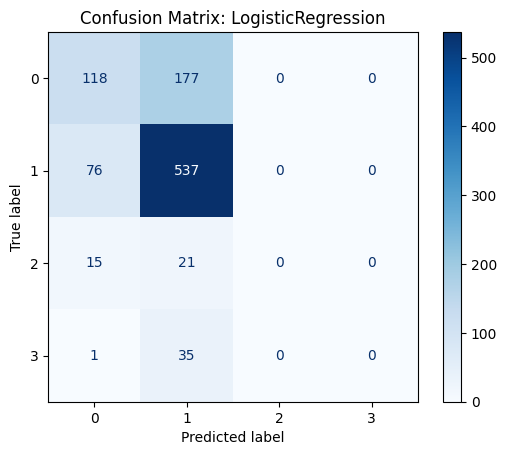

Training Random Forest
Random Forest Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

     Average       0.74      0.71      0.72       295
        Good       0.82      0.90      0.86       613
         bad       0.77      0.28      0.41        36
        best       0.88      0.39      0.54        36

    accuracy                           0.80       980
   macro avg       0.80      0.57      0.63       980
weighted avg       0.80      0.80      0.79       980



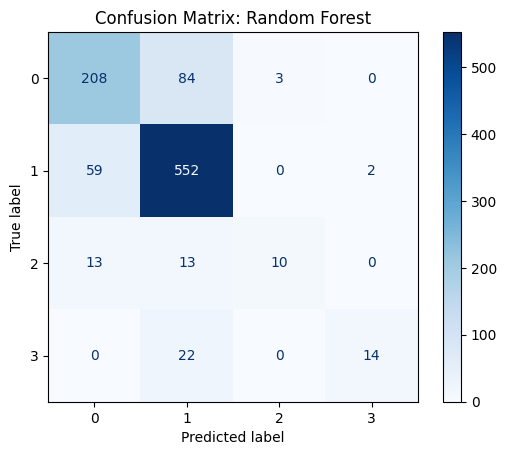

Training Decision Tree
Decision Tree Accuracy: 0.7061224489795919

Classification Report:
              precision    recall  f1-score   support

     Average       0.62      0.67      0.64       295
        Good       0.81      0.76      0.78       613
         bad       0.35      0.36      0.36        36
        best       0.32      0.42      0.36        36

    accuracy                           0.71       980
   macro avg       0.52      0.55      0.54       980
weighted avg       0.72      0.71      0.71       980



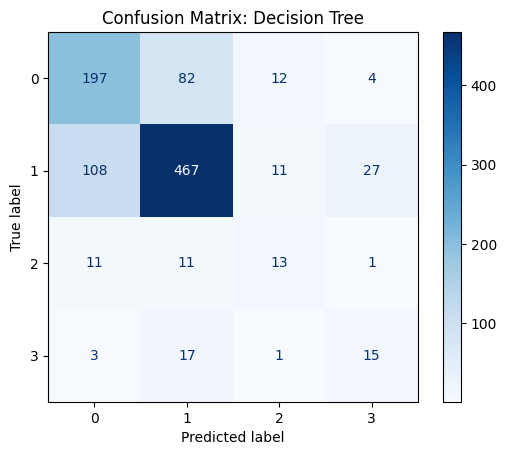

Training k-Nearest Neigbour
k-Nearest Neigbour Accuracy: 0.7061224489795919

Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.61      0.61       295
        Good       0.76      0.82      0.79       613
         bad       0.33      0.03      0.05        36
        best       0.50      0.17      0.25        36

    accuracy                           0.71       980
   macro avg       0.55      0.41      0.42       980
weighted avg       0.69      0.71      0.69       980



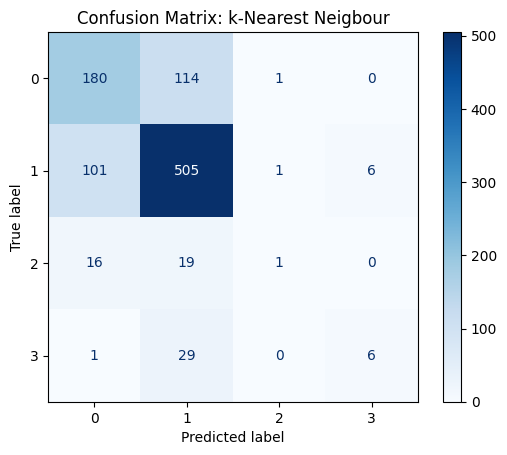

Training svm
svm Accuracy: 0.7040816326530612

Classification Report:
              precision    recall  f1-score   support

     Average       0.63      0.49      0.55       295
        Good       0.73      0.89      0.80       613
         bad       0.00      0.00      0.00        36
        best       0.00      0.00      0.00        36

    accuracy                           0.70       980
   macro avg       0.34      0.34      0.34       980
weighted avg       0.64      0.70      0.67       980



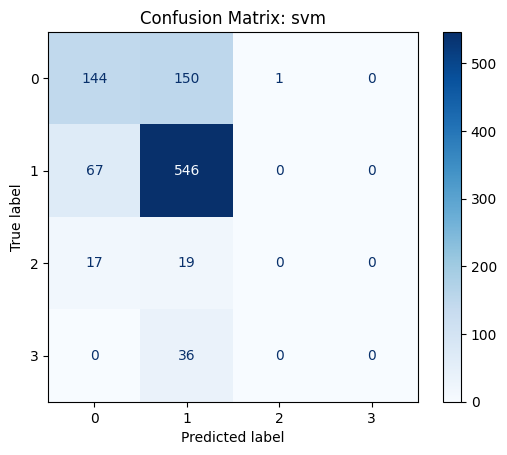

Training Naive Bayes
Naive Bayes Accuracy: 0.6020408163265306

Classification Report:
              precision    recall  f1-score   support

     Average       0.48      0.49      0.49       295
        Good       0.71      0.71      0.71       613
         bad       0.21      0.22      0.22        36
        best       0.10      0.08      0.09        36

    accuracy                           0.60       980
   macro avg       0.38      0.38      0.38       980
weighted avg       0.60      0.60      0.60       980



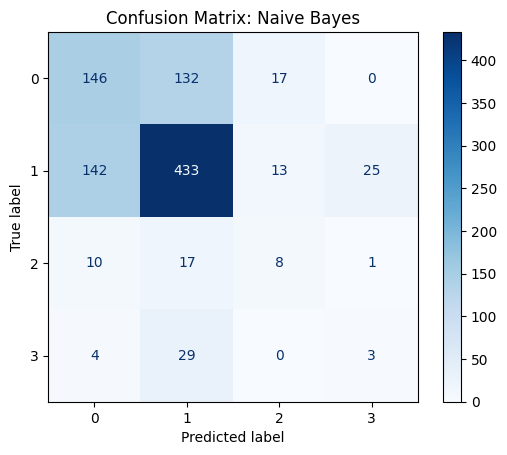

In [18]:
# iinitialize a dictionary to store the model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}")
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

    # let's include confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_predict))

    # plot with model as title
    display_cm.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

## Final Model Comparison

| Model               | Accuracy | Macro F1-score | Weighted F1-score | Minority Class F1 (avg) | Notes                        |
|--------------------|----------|----------------|-------------------|--------------------------|------------------------------|
| **Random Forest**        | **0.80**     | **0.63**         | **0.79**            | **0.48**                   | Best overall performance     |
| Decision Tree       | 0.71     | 0.54           | 0.71              | 0.36                      | Decent, but less balanced    |
| k-Nearest Neighbour | 0.71     | 0.42           | 0.69              | 0.15                      | Struggles with rare classes  |
| Logistic Regression | 0.67     | 0.31           | 0.63              | 0.00                      | Fails on minority classes    |
| Naive Bayes         | 0.60     | 0.38           | 0.60              | 0.16                      | Weakest overall              |


Why Random Forest Was Chosen
Performance Superiority
Highest accuracy: 80% vs. 60–71% for others.

Strong F1-scores across all classes, especially for minority classes like “bad” and “best” (0.41 and 0.54).

Balanced macro and weighted averages, indicating consistent performance across both frequent and rare classes.

Technical Strengths
Ensemble learning: Combines multiple decision trees to reduce overfitting and improve generalization.

Handles class imbalance: Performs well even when some classes have very few samples.

Captures non-linear relationships: Unlike Logistic Regression or Naive Bayes, Random Forest can model complex feature interactions.

Weaknesses of Other Models
Logistic Regression: Completely failed to identify minority classes (F1 = 0.00).

Naive Bayes: Assumes feature independence, which doesn’t hold in real-world data like wine quality.

k-NN: Sensitive to noisy data and struggles with class boundaries.

Decision Tree: Decent, but prone to overfitting and less stable than Random Forest.

Executive Summary for Your Report
Model Selection Justification: After evaluating five classification models on the wine quality dataset, Random Forest was selected as the optimal model due to its superior performance across all evaluation metrics. It achieved the highest accuracy (80%) and demonstrated strong precision and recall for both majority and minority classes. Unlike other models, Random Forest effectively handled class imbalance and captured complex patterns in the data.

Its ensemble nature, robustness to overfitting, and ability to rank feature importance make it ideal for deployment in real-world scenarios. Based on both quantitative metrics and qualitative analysis of confusion matrices, Random Forest is the most reliable and interpretable model for predicting wine quality.

confusion matrix

Model-by-Model Breakdown
1. Random Forest
Strong diagonal dominance: Most predictions fall along the diagonal, indicating correct classification.

Class 1 ("Good"): 552 correct out of 613 — very high recall.

Minority classes (2 and 3): Some misclassification into class 1, but still better than other models.

Overall: Balanced and accurate across all classes.

2. Logistic Regression
Heavy bias toward class 1: Most samples, including minority classes, are misclassified as class 1.

Class 0 ("Average"): 118 correct, but 177 misclassified as class 1.

Classes 2 and 3: Completely misclassified — zero correct predictions.

Overall: Poor performance on minority classes.

3. Decision Tree
Class 0 and 1: Reasonable performance (197 and 467 correct).

Class 1 misclassified as 0: 108 instances — shows overfitting or poor boundary separation.

Classes 2 and 3: Weak performance, but better than Logistic Regression.

Overall: Decent, but less stable than Random Forest.

4. k-Nearest Neighbour
Class 1 ("Good"): 505 correct, but 101 misclassified as class 0.

Class 0 ("Average"): 180 correct, 114 misclassified as class 1.

Classes 2 and 3: Very poor — almost all misclassified as class 1.

Overall: Sensitive to class imbalance and noisy boundaries.

5. Naive Bayes
Class 1 ("Good"): 433 correct, but 142 misclassified as class 0.

Class 0 ("Average"): 146 correct, 132 misclassified as class 1.

Classes 2 and 3: Mostly misclassified as class 1 or 0.

Overall: Weak performance due to unrealistic independence assumptions.

confusion matrix and cls report for random forest

Correct Predictions (Diagonal)
- Class 0: 208 correctly predicted
- Class 1: 552 correctly predicted
- Class 2: 10 correctly predicted
- Class 3: 14 correctly predicted

 Misclassifications (Off-Diagonal)
- Class 0 was often confused with class 1 (84 times)
- Class 1 was sometimes confused with class 0 (59 times)
- Class 2 was equally confused between class 0 and 1 (13 each)
- Class 3 was mostly misclassified as class 1 (22 times)

Interpretation & Insights
- Class 1 is the most accurately predicted class, with 552 correct out of 613 total instances (accuracy ≈ 90%).
- Class 0 has decent performance but suffers from confusion with class 1 (accuracy ≈ 70%).
- Class 2 and 3 have low support (few samples), and their predictions are less reliable. Especially class 3, which is misclassified as class 1 more than it's correctly predicted.
- The model seems biased toward predicting class 1 — possibly due to class imbalance or overlapping features.




In [20]:
# lets get parameters for Random forest
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [24]:
# Lets define RandomSearchCv
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=234), param_distributions= param_grid, cv= 5, n_jobs=1, verbose=1, random_state=50)
random_search.fit(x_train, y_train)
print(f"Best parameter for Random Forest:{random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter for Random Forest:{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best cross-validation accuracy: 0.7726


In [25]:
# Cross validation score for the best model - Random Forest
best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, x_scaled, y, cv = 5)
print(f"Cross-Validtion scores for Random Forest: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-Validtion scores for Random Forest: [0.65612245 0.67244898 0.71020408 0.70786517 0.71399387]
Mean cross-validation score: 0.69212691000813


In [26]:
y_pred = best_model.predict(x_test)
print('\nClassification Report: ')
print(classification_report(y_test,y_pred, zero_division=1))


Classification Report: 
              precision    recall  f1-score   support

     Average       0.75      0.70      0.72       295
        Good       0.81      0.91      0.86       613
         bad       0.70      0.19      0.30        36
        best       0.90      0.25      0.39        36

    accuracy                           0.79       980
   macro avg       0.79      0.51      0.57       980
weighted avg       0.79      0.79      0.78       980



| Class            | Precision | Recall | F1-score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| **Average**      | 0.75      | 0.70   | 0.72     | 295     |
| **Good**         | 0.81      | 0.91   | 0.86     | 613     |
| **bad**          | 0.70      | 0.19   | 0.30     | 36      |
| **best**         | 0.90      | 0.25   | 0.39     | 36      |
| **Accuracy**     | —         | —      | **0.79** | 980     |
| **Macro avg**    | 0.79      | 0.51   | 0.57     | —       |
| **Weighted avg** | 0.79      | 0.79   | 0.78     | —       |


Step-by-Step Interpretation
1. Overall Accuracy = 0.79

The model correctly classified about 79% of all wines in your test data.

That’s solid performance for a multi-class problem with some imbalance.

2. Performance by Category
Class	Meaning	Interpretation
Good	Majority class	Excellent recall (0.91) → model captures most “Good” wines correctly. High F1-score (0.86) = consistent accuracy.
Average	Moderate class	Fairly balanced precision and recall (≈0.7). Model confuses some with “Good” wines — a common overlap.
bad	Minority class	Low recall (0.19) → model misses many actual bad wines, though when it predicts “bad,” it’s often correct (precision 0.70).
best	Minority class	Very high precision (0.90) but low recall (0.25) → model is very cautious about predicting “best”; it only predicts them when very sure, but misses most true ones.
3. Averages

Macro avg recall = 0.51 → the model’s ability to catch each class equally is limited (affected by rare classes).

Weighted avg ≈ accuracy (0.79) → large classes dominate the model’s performance, hiding weaknesses in small ones.

In [27]:
# Lets save our best model as pickle file

joblib.dump(best_model, 'best_model.pkl')

# lets save the scaler(standardscaler used for the feature scaling)
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler have been saved succes")

Model and scaler have been saved succes
